In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from textblob import TextBlob
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

In [3]:
print("📊 YouTube Trending Analytics Started")
print("=====================================")

📊 YouTube Trending Analytics Started


In [4]:
def load_and_clean_data(file_paths):
    """Load and clean YouTube data from multiple countries"""
    all_data = []
    
    for country, path in file_paths.items():
        try:
            print(f"Loading {country} data...")
            df = pd.read_csv(path)
            df['country'] = country

            
            df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m', errors='coerce')
            df['publishedAt'] = pd.to_datetime(df['publishedAt'], errors='coerce')
            
           
            for col in ['view_count', 'likes', 'dislikes', 'comment_count']:
                if col in df.columns:
                    df[col] = pd.to_numeric(df[col], errors='coerce')
            
            df['engagement_rate'] = (df.get('likes', 0) + df.get('dislikes', 0)) / df.get('view_count', 1)
            df['like_ratio'] = df.get('likes', 0) / (df.get('likes', 0) + df.get('dislikes', 1))
            
            df = df.drop_duplicates(subset=['video_id'], keep='first')
            df = df.dropna(subset=['title', 'view_count'])
            
            all_data.append(df)
            print(f"✅ {country}: {len(df):,} videos loaded")
            
        except Exception as e:
            print(f"❌ Error loading {country}: {e}")



In [5]:
file_paths = {
    'US': "C:/Users/akars/OneDrive/Desktop/project datasets/US_youtube_trending_data.csv",
    'GB': "C:/Users/akars/OneDrive/Desktop/project datasets/GB_youtube_trending_data.csv",
    'CA': "C:/Users/akars/OneDrive/Desktop/project datasets/CA_youtube_trending_data.csv",
    'GE': "C:/Users/akars/OneDrive/Desktop/project datasets/DE_youtube_trending_data.csv",
    'FR': "C:/Users/akars/OneDrive/Desktop/project datasets/FR_youtube_trending_data.csv",
    'IN': "C:/Users/akars/OneDrive/Desktop/project datasets/IN_youtube_trending_data.csv"
}

datasets =load_and_clean_data(file_paths)

Loading US data...
✅ US: 47,142 videos loaded
Loading GB data...
✅ GB: 47,607 videos loaded
Loading CA data...
✅ CA: 50,875 videos loaded
Loading GE data...
✅ GE: 55,476 videos loaded
Loading FR data...
✅ FR: 54,170 videos loaded
Loading IN data...
✅ IN: 77,850 videos loaded


In [6]:
def combine_data(all_data):
    if all_data:
        combined_df = pd.concat(all_data, ignore_index=True)
        print(f"\n🎉 Total dataset: {len(combined_df):,} videos from {len(all_data)} countries")
        return combined_df
    else:
        print("❌ No data loaded successfully")
        return None

In [7]:
import psutil
memory = psutil.virtual_memory()
print(f"Available memory: {memory.available/1024/1024:.0f} MB")
print(f"Memory usage: {memory.percent:.1f}%")

Available memory: 5786 MB
Memory usage: 63.0%


In [8]:
import os
def load_sample_data(file_paths, sample_size=2000):
    samples = []
    for country, path in file_paths.items():
        if os.path.exists(path):
            df = pd.read_csv(path, nrows=sample_size)
            df['country'] = country
            samples.append(df)
            print(f"Loaded {country}: {len(df)} rows")
    
    if samples:
        return pd.concat(samples, ignore_index=True)
    return None

df = load_sample_data(file_paths, sample_size=1000)  

Loaded US: 1000 rows
Loaded GB: 1000 rows
Loaded CA: 1000 rows
Loaded GE: 1000 rows
Loaded FR: 1000 rows
Loaded IN: 1000 rows


In [9]:
df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,US
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",US
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,US
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,US
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,i420AguDNDs,Billo Tu Agg Song Teaser 2 | Singhsta Featurin...,2020-08-16T05:32:11Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-17T00:00:00Z,billo tu agg Song|billo tu agg|Song|honey Sing...,1081149,94938,3646,8477,NaN,False,False,Presenting the teaser of the song Billo Tu Agg...,IN
5996,qwEWKKAVtao,"Musse - Full Song | Surender Romio, Ruchika Ja...",2020-08-13T11:30:11Z,UCbYXVxwDEWc9sIt6yZhweqQ,Nav Haryanvi,10,2020-08-17T00:00:00Z,Musse|Musse Song|Musse Haryanvi|Musse Surender...,695733,29171,801,1353,NaN,False,False,"Musse - Full Song | Surender Romio, Ruchika Ja...",IN
5997,oiUbeyqef_E,OTP Episode 1 | This Video is Dedicated to all...,2020-08-14T11:10:44Z,UCpJtLM2WwHKpKBDExCg8vUw,Sekhar Studio,24,2020-08-17T00:00:00Z,otp|osey thingari pilla|OTP Episode 1|Osey thi...,188627,11218,692,442,NaN,False,False,#OTP #Oseythingaripilla #WebSeries #SekharStud...,IN
5998,0gI2o4TcY_g,2020 Anukunnadi Okati Ayyinadi Okati Promo 2 -...,2020-08-15T10:56:41Z,UCULLmfWqhMOeiWEV6hkMSCg,mallemalatv,24,2020-08-17T00:00:00Z,2020 Anukunnadi Okati Ayyinadi Okati|2020 Anuk...,4984599,120318,11421,7441,NaN,False,False,#VinayakaChavithi Special Event - #2020Anukun...,IN


In [10]:

def load_data_in_chunks(file_paths, chunk_size=5000, sample_size=None):
    """Load data in chunks to avoid memory issues"""
    print("🔄 Loading data in chunks to manage memory...")
    
    all_data = []
    
    for country, path in file_paths.items():
        if not os.path.exists(path):
            print(f"❌ File not found: {path}")
            continue
            
        print(f"\n📂 Processing {country}...")
        
        try:
            total_rows = sum(1 for line in open(path)) - 1 
            print(f"   Total rows in file: {total_rows:,}")
            
            if sample_size and total_rows > sample_size:
                print(f"   Sampling {sample_size:,} rows from {total_rows:,}")
               
                skip = sorted(np.random.choice(range(1, total_rows + 1), 
                                             total_rows - sample_size, 
                                             replace=False))
                df = pd.read_csv(path, skiprows=skip)
            else:
                
                chunks = []
                for chunk in pd.read_csv(path, chunksize=chunk_size):
                    chunk['country'] = country
                    chunks.append(chunk)
                    
                    if len(chunks) % 10 == 0:
                        print(f"   Processed {len(chunks) * chunk_size:,} rows...")
                
                df = pd.concat(chunks, ignore_index=True)
            
            df = clean_data_chunk(df)
            
            df = optimize_dataframe_memory(df)
            
            all_data.append(df)
            print(f"✅ Loaded {country}: {len(df):,} rows")
            
            gc.collect()
            
        except Exception as e:
            print(f"❌ Error loading {country}: {e}")
    
    if all_data:
        print("\n🔗 Combining all datasets...")
        combined_df = pd.concat(all_data, ignore_index=True)
        combined_df = optimize_dataframe_memory(combined_df)
        
        print(f"✅ Final dataset: {len(combined_df):,} rows, {len(combined_df.columns)} columns")
        return combined_df
    else:
        print("❌ No data loaded successfully")
        return None

def clean_data_chunk(df):
    """Clean data chunk with minimal memory usage"""
    df = df.drop_duplicates(subset=['video_id'] if 'video_id' in df.columns else None, keep='first')
    
    critical_cols = ['title', 'view_count']
    existing_critical_cols = [col for col in critical_cols if col in df.columns]
    if existing_critical_cols:
        df = df.dropna(subset=existing_critical_cols)
    
    if 'view_count' in df.columns:
        df['view_count'] = pd.to_numeric(df['view_count'], errors='coerce')
    
    return df

In [11]:
df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,US
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",US
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,US
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,US
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,i420AguDNDs,Billo Tu Agg Song Teaser 2 | Singhsta Featurin...,2020-08-16T05:32:11Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-17T00:00:00Z,billo tu agg Song|billo tu agg|Song|honey Sing...,1081149,94938,3646,8477,NaN,False,False,Presenting the teaser of the song Billo Tu Agg...,IN
5996,qwEWKKAVtao,"Musse - Full Song | Surender Romio, Ruchika Ja...",2020-08-13T11:30:11Z,UCbYXVxwDEWc9sIt6yZhweqQ,Nav Haryanvi,10,2020-08-17T00:00:00Z,Musse|Musse Song|Musse Haryanvi|Musse Surender...,695733,29171,801,1353,NaN,False,False,"Musse - Full Song | Surender Romio, Ruchika Ja...",IN
5997,oiUbeyqef_E,OTP Episode 1 | This Video is Dedicated to all...,2020-08-14T11:10:44Z,UCpJtLM2WwHKpKBDExCg8vUw,Sekhar Studio,24,2020-08-17T00:00:00Z,otp|osey thingari pilla|OTP Episode 1|Osey thi...,188627,11218,692,442,NaN,False,False,#OTP #Oseythingaripilla #WebSeries #SekharStud...,IN
5998,0gI2o4TcY_g,2020 Anukunnadi Okati Ayyinadi Okati Promo 2 -...,2020-08-15T10:56:41Z,UCULLmfWqhMOeiWEV6hkMSCg,mallemalatv,24,2020-08-17T00:00:00Z,2020 Anukunnadi Okati Ayyinadi Okati|2020 Anuk...,4984599,120318,11421,7441,NaN,False,False,#VinayakaChavithi Special Event - #2020Anukun...,IN


In [12]:
import json

with open(r"C:\Users\akars\Downloads\IN_category_id.json", 'r') as f:
    category_data = json.load(f)

category_map = {int(item['id']): item['snippet']['title'] for item in category_data['items']}

df['category_name'] = df['categoryId'].map(category_map)

In [13]:
df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country,category_name
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,US,People & Blogs
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",US,Gaming
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,US,Entertainment
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,US,Music
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,US,Howto & Style
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,i420AguDNDs,Billo Tu Agg Song Teaser 2 | Singhsta Featurin...,2020-08-16T05:32:11Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-17T00:00:00Z,billo tu agg Song|billo tu agg|Song|honey Sing...,1081149,94938,3646,8477,NaN,False,False,Presenting the teaser of the song Billo Tu Agg...,IN,Music
5996,qwEWKKAVtao,"Musse - Full Song | Surender Romio, Ruchika Ja...",2020-08-13T11:30:11Z,UCbYXVxwDEWc9sIt6yZhweqQ,Nav Haryanvi,10,2020-08-17T00:00:00Z,Musse|Musse Song|Musse Haryanvi|Musse Surender...,695733,29171,801,1353,NaN,False,False,"Musse - Full Song | Surender Romio, Ruchika Ja...",IN,Music
5997,oiUbeyqef_E,OTP Episode 1 | This Video is Dedicated to all...,2020-08-14T11:10:44Z,UCpJtLM2WwHKpKBDExCg8vUw,Sekhar Studio,24,2020-08-17T00:00:00Z,otp|osey thingari pilla|OTP Episode 1|Osey thi...,188627,11218,692,442,NaN,False,False,#OTP #Oseythingaripilla #WebSeries #SekharStud...,IN,Entertainment
5998,0gI2o4TcY_g,2020 Anukunnadi Okati Ayyinadi Okati Promo 2 -...,2020-08-15T10:56:41Z,UCULLmfWqhMOeiWEV6hkMSCg,mallemalatv,24,2020-08-17T00:00:00Z,2020 Anukunnadi Okati Ayyinadi Okati|2020 Anuk...,4984599,120318,11421,7441,NaN,False,False,#VinayakaChavithi Special Event - #2020Anukun...,IN,Entertainment


In [14]:
def add_sentiment_analysis(df):
    """Add sentiment analysis to titles"""
    print("\n🔍 Performing sentiment analysis...")
    
    def get_sentiment(title):
        if pd.isna(title):
            return 'neutral', 0
        
        clean_title = re.sub(r'[^\w\s]', ' ', str(title))
        clean_title = re.sub(r'\s+', ' ', clean_title).strip()
        
        blob = TextBlob(clean_title)
        polarity = blob.sentiment.polarity
        
        if polarity > 0.1:
            return 'positive', polarity
        elif polarity < -0.1:
            return 'negative', polarity
        else:
            return 'neutral', polarity
    
    sentiment_data = df['title'].apply(get_sentiment)
    df['sentiment'] = [s[0] for s in sentiment_data]
    df['sentiment_score'] = [s[1] for s in sentiment_data]
    
    sentiment_counts = df['sentiment'].value_counts()
    print("✅ Sentiment distribution:")
    for sentiment, count in sentiment_counts.items():
        pct = (count / len(df)) * 100
        print(f"   {sentiment.title()}: {count:,} ({pct:.1f}%)")
    
    return df

In [15]:
df = add_sentiment_analysis(df)


🔍 Performing sentiment analysis...
✅ Sentiment distribution:
   Neutral: 4,467 (74.5%)
   Positive: 1,082 (18.0%)
   Negative: 451 (7.5%)


In [16]:
df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country,category_name,sentiment,sentiment_score
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,US,People & Blogs,neutral,0.000000e+00
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",US,Gaming,neutral,0.000000e+00
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,US,Entertainment,neutral,0.000000e+00
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,US,Music,neutral,0.000000e+00
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,US,Howto & Style,neutral,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,i420AguDNDs,Billo Tu Agg Song Teaser 2 | Singhsta Featurin...,2020-08-16T05:32:11Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-17T00:00:00Z,billo tu agg Song|billo tu agg|Song|honey Sing...,1081149,94938,3646,8477,NaN,False,False,Presenting the teaser of the song Billo Tu Agg...,IN,Music,neutral,0.000000e+00
5996,qwEWKKAVtao,"Musse - Full Song | Surender Romio, Ruchika Ja...",2020-08-13T11:30:11Z,UCbYXVxwDEWc9sIt6yZhweqQ,Nav Haryanvi,10,2020-08-17T00:00:00Z,Musse|Musse Song|Musse Haryanvi|Musse Surender...,695733,29171,801,1353,NaN,False,False,"Musse - Full Song | Surender Romio, Ruchika Ja...",IN,Music,positive,2.431818e-01
5997,oiUbeyqef_E,OTP Episode 1 | This Video is Dedicated to all...,2020-08-14T11:10:44Z,UCpJtLM2WwHKpKBDExCg8vUw,Sekhar Studio,24,2020-08-17T00:00:00Z,otp|osey thingari pilla|OTP Episode 1|Osey thi...,188627,11218,692,442,NaN,False,False,#OTP #Oseythingaripilla #WebSeries #SekharStud...,IN,Entertainment,neutral,0.000000e+00
5998,0gI2o4TcY_g,2020 Anukunnadi Okati Ayyinadi Okati Promo 2 -...,2020-08-15T10:56:41Z,UCULLmfWqhMOeiWEV6hkMSCg,mallemalatv,24,2020-08-17T00:00:00Z,2020 Anukunnadi Okati Ayyinadi Okati|2020 Anuk...,4984599,120318,11421,7441,NaN,False,False,#VinayakaChavithi Special Event - #2020Anukun...,IN,Entertainment,neutral,0.000000e+00


In [17]:
def clean_youtube_data(df):
    """
    Clean and standardize YouTube data
    """
    df_clean = df.copy()
    
    if 'trending_date' in df_clean.columns:
      
        df_clean['trending_date'] = pd.to_datetime(df_clean['trending_date'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')
    
    nat_count = df_clean['trending_date'].isna().sum()
    if nat_count > 0:
        print(f"Warning: {nat_count} dates couldn't be parsed.")
        
        df_clean['trending_date'] = pd.to_datetime(df_clean['trending_date'], errors='coerce')
        
        nat_count = df_clean['trending_date'].isna().sum()
        print(f"After flexible parsing: {nat_count} dates still couldn't be parsed.")
        
    if 'publishedAt' in df_clean.columns:
        df_clean['publishedAt'] = pd.to_datetime(df_clean['publishedAt'], errors='coerce')
    
    numeric_cols = ['view_count', 'likes', 'dislikes', 'comment_count']
    for col in numeric_cols:
        if col in df_clean.columns:
            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
    
    df_clean['total_engagement'] = df_clean.get('likes', 0) + df_clean.get('dislikes', 0)
    df_clean['like_ratio'] = df_clean.get('likes', 0) / (df_clean.get('likes', 0) + df_clean.get('dislikes', 1))
    df_clean['engagement_rate'] = df_clean['total_engagement'] / df_clean.get('view_count', 1)
    
    if 'video_id' in df_clean.columns and 'trending_date' in df_clean.columns:
        
        trending_duration = df_clean.groupby('video_id')['trending_date'].agg(['min', 'max'])
        trending_duration['trending_days'] = (trending_duration['max'] - trending_duration['min']).dt.days + 1
        
        df_clean = df_clean.merge(trending_duration['trending_days'], on='video_id', how='left')
        
        df_clean['trending_days'] = df_clean['trending_days'].fillna(1)
    
    
    df_clean = df_clean.drop_duplicates(subset=['video_id'], keep='first')
    
    df_clean = df_clean.dropna(subset=['title', 'view_count'])
    
    return df_clean

    

In [18]:
pd.set_option('display.max_rows', 50)
df_cl = clean_youtube_data(df)
df_cl

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,ratings_disabled,description,country,category_name,sentiment,sentiment_score,total_engagement,like_ratio,engagement_rate,trending_days
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,...,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,US,People & Blogs,neutral,0.000000,162763,0.964027,0.107462,5
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,...,False,"While running her own modding shop, Ramya Pare...",US,Gaming,neutral,0.000000,149533,0.981315,0.062784,5
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,...,False,I left youtube for a month and this is what ha...,US,Entertainment,neutral,0.000000,356415,0.992627,0.174812,5
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,...,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,US,Music,neutral,0.000000,25107,0.926076,0.050540,5
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,...,False,Transforming The LaBrant Family's empty white ...,US,Howto & Style,neutral,0.000000,46766,0.979387,0.041611,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,P-aVkb4Bx58,पोहा का आसान टेस्टी नाश्ता व धनिये की चटनी । C...,2020-08-17 05:21:17+00:00,UCgoxyzvouZM-tCgsYzrYtyg,NishaMadhulika,26,2020-08-17,Poha ka aasan nashta|poha tikki recipe|poha kh...,198211,9317,...,False,"Poha ka tasty nashta, poha khasta recipe, Dahi...",IN,Howto & Style,neutral,0.000000,9556,0.974990,0.048211,1
5977,a1PhXN8KcYA,When Sister Comes Home | #StayHome Create #Wi...,2020-08-15 14:00:10+00:00,UC38PDlv1vGvi8djaFf4fdKA,Narikootam,24,2020-08-17,narikootam|narikootam videos|tamil comedy vide...,575676,34488,...,False,#tamadamedia #narikootam #wirallyA video showi...,IN,Entertainment,neutral,0.000000,35283,0.977468,0.061290,1
5979,2PRx3gZ6szs,Nuvve Kavaali | Web Series - Episode 4 | HEY P...,2020-08-16 14:57:54+00:00,UCn_DZJs6iiF0JDHTMwiKM2w,Hey Pilla!,24,2020-08-17,[None],139559,5645,...,False,Special thanks Sripad Nandiraj Cast:ViraajitaR...,IN,Entertainment,neutral,0.000000,6046,0.933675,0.043322,1
5986,EakdmaFfWp8,ఇంకుడుగుంత నిర్మించుకోవడం ఎలా ? | My Village S...,2020-08-16 04:09:37+00:00,UCyQMHued_mvOHi9FcchzMZg,My Village Show Vlogs,22,2020-08-17,my village show|diy|farming|soak pit|construct...,88195,6483,...,False,Email : sriram.srikanth05@gmail.comInstagram :...,IN,People & Blogs,neutral,0.000000,6644,0.975768,0.075333,1


In [19]:
import pandas as pd
import sqlite3

conn = sqlite3.connect(':memory:')

df_cl.to_sql('trending_videos', conn, index=False, if_exists='replace')

def execute_sql_queries(conn):
    """
    Execute key SQL queries for analysis
    """
    queries = {}
    
    queries['top_categories_by_views'] = """
    SELECT 
        category_name,
        COUNT(*) as video_count,
        AVG(tv.view_count) as avg_views,
        AVG(tv.like_ratio) as avg_like_ratio
    FROM trending_videos tv
    GROUP BY category_name
    ORDER BY avg_views DESC
    LIMIT 10;
    """
    
    queries['country_comparison'] = """
    SELECT 
        country,
        COUNT(*) as total_videos,
        AVG(view_count) as avg_views,
        AVG(engagement_rate) as avg_engagement,
        AVG(trending_days) as avg_trending_duration
    FROM trending_videos
    WHERE trending_days IS NOT NULL
    GROUP BY country
    ORDER BY avg_views DESC;
    """
    
    queries['sentiment_by_country'] = """
    SELECT 
        country,
        sentiment,
        COUNT(*) as count,
        AVG(view_count) as avg_views
    FROM trending_videos
    GROUP BY country, sentiment
    ORDER BY country, avg_views DESC;
    """
    

    
    results = {}
    for query_name, query in queries.items():
        results[query_name] = pd.read_sql_query(query, conn)
        print(f"Executed: {query_name}")
    
    return results


sql_results = execute_sql_queries(conn)

conn.close()

Executed: top_categories_by_views
Executed: country_comparison
Executed: sentiment_by_country


In [20]:
sql_results


{'top_categories_by_views':           category_name  video_count     avg_views  avg_like_ratio
 0  Science & Technology           36  2.677783e+06        0.940838
 1                 Music          285  1.785167e+06        0.967756
 2                Gaming           49  1.246217e+06        0.967100
 3         Entertainment          450  1.020966e+06        0.950281
 4       News & Politics           74  1.002617e+06        0.889606
 5                Comedy          102  8.995971e+05        0.978150
 6        People & Blogs          145  6.845643e+05        0.964737
 7      Film & Animation           26  4.849974e+05        0.979423
 8                Sports          270  4.786023e+05        0.962039
 9         Howto & Style           87  4.517879e+05        0.963653,
 'country_comparison':   country  total_videos     avg_views  avg_engagement  avg_trending_duration
 0      US           337  1.707548e+06        0.070489               3.160237
 1      IN           398  1.666139e+06        

In [21]:
def create_visualizations(df_cl, sql_results):
    """
    Create comprehensive visualizations using matplotlib and seaborn
    """
    plt.style.use('seaborn-v0_8-darkgrid')
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57']
    
    def plot_category_views():
        plt.figure(figsize=(10, 6))
        cat_data = sql_results['top_categories_by_views'].head(10)
        plt.bar(range(len(cat_data)), cat_data['avg_views'], color=colors[0], alpha=0.8)
        plt.title('Average Views by Category', fontweight='bold', fontsize=14)
        plt.xlabel('Categories')
        plt.ylabel('Average Views (millions)')
        plt.xticks(range(len(cat_data)), cat_data['category_name'], rotation=45, ha='right')
        plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))
        plt.tight_layout()
        plt.show()
    
    def plot_country_engagement():
        plt.figure(figsize=(10, 6))
        country_data = sql_results['country_comparison']
        plt.plot(country_data['country'], country_data['avg_engagement'], 
                'o-', color=colors[1], linewidth=2, markersize=8, alpha=0.8)
        plt.title('Engagement Rate by Country', fontweight='bold', fontsize=14)
        plt.xlabel('Country')
        plt.ylabel('Average Engagement Rate')
        plt.tick_params(axis='x', rotation=45)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    def plot_sentiment_distribution():
        plt.figure(figsize=(8, 8))
        sentiment_counts = df_cl['sentiment'].value_counts()
        plt.pie(sentiment_counts.values, 
                labels=sentiment_counts.index,
                autopct='%1.1f%%',
                colors=colors[:len(sentiment_counts)],
                startangle=90)
        plt.title('Sentiment Distribution', fontweight='bold', fontsize=14)
        plt.axis('equal') 
        plt.tight_layout()
        plt.show()
    
    return plot_category_views, plot_country_engagement, plot_sentiment_distribution

In [22]:
create_visualizations(df_cl,sql_results)

(<function __main__.create_visualizations.<locals>.plot_category_views()>,
 <function __main__.create_visualizations.<locals>.plot_country_engagement()>,
 <function __main__.create_visualizations.<locals>.plot_sentiment_distribution()>)

In [23]:
plot_category_views, plot_country_engagement, plot_sentiment_distribution = create_visualizations(df_cl, sql_results)

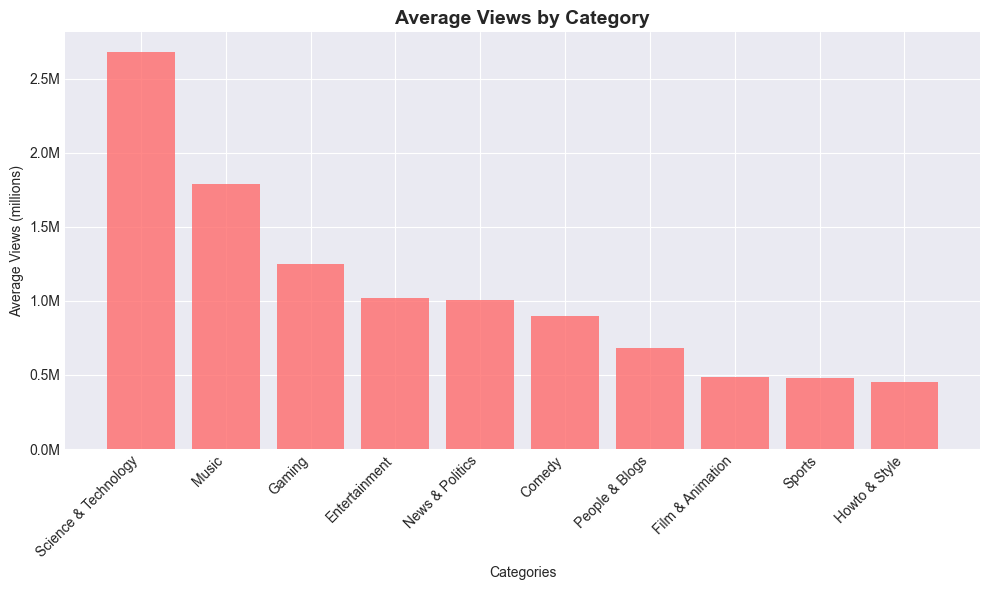

In [24]:
plot_category_views()

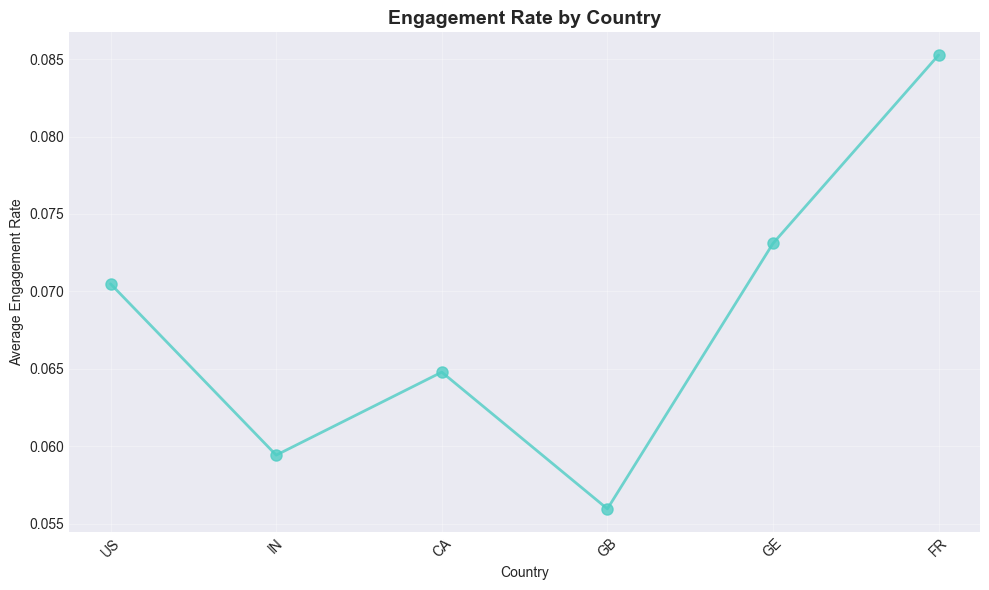

In [25]:
plot_country_engagement()

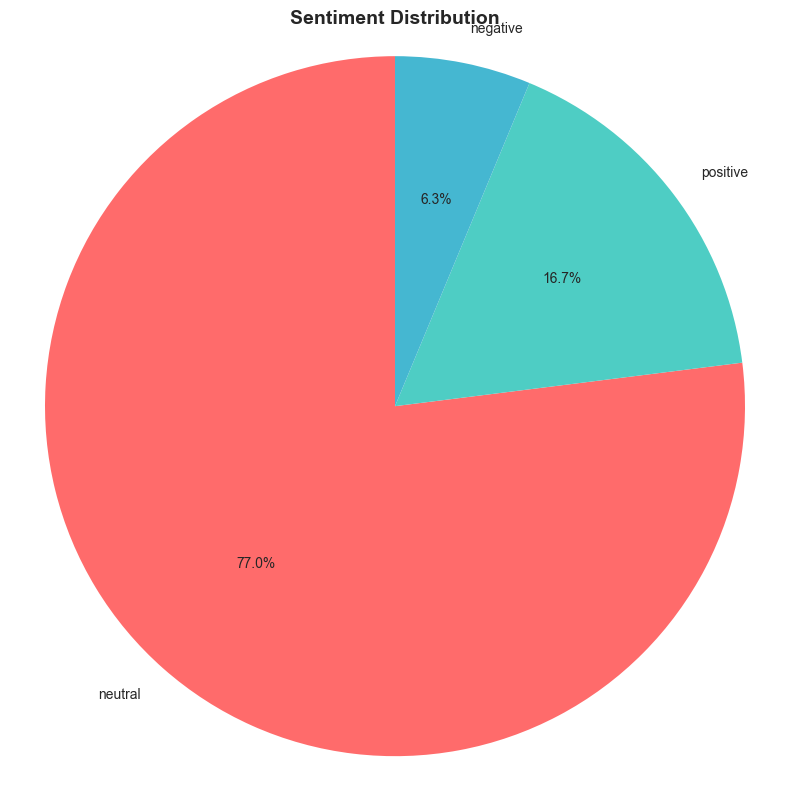

In [26]:
plot_sentiment_distribution()

In [27]:
def plot_views_by_country(df_cl):
    """Plots the view count distribution by country."""
    plt.figure(figsize=(10, 6))
    countries = df_cl['country'].value_counts().head(6).index
    df_top_countries = df_cl[df_cl['country'].isin(countries)]
    
    ax = sns.boxplot(data=df_top_countries, x='country', y='view_count')
    ax.set_yscale('log')
    ax.set_title('View Count Distribution (Top 6 Countries)')
    ax.set_ylabel('View Count (Log Scale)')
    ax.set_xlabel('Country')
    ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    return plt.gcf()

def plot_trending_duration(df_cl):
    """Plots the distribution of trending duration."""
    plt.figure(figsize=(10, 6))
    
    trending_duration_clean = df_cl['trending_days'].dropna()
    trending_duration_clean = trending_duration_clean[
        (trending_duration_clean >= 0) & (trending_duration_clean <= 365)
    ]
    
    plt.hist(trending_duration_clean, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    plt.xlabel('Days to Trend')
    plt.ylabel('Frequency')
    plt.title('Distribution of Trending Duration')
    
    plt.tight_layout()
    plt.show()
    return plt.gcf()

def plot_weekly_patterns(df_cl):
    """Plots the number of trending videos by day of the week."""
    plt.figure(figsize=(10, 6))
    
    df_copy = df_cl.copy()
    df_copy['day_of_week'] = df_copy['trending_date'].dt.day_name()
    weekly_pattern = df_copy['day_of_week'].value_counts().reindex([
        'Monday', 'Tuesday', 'Wednesday', 'Thursday', 
        'Friday', 'Saturday', 'Sunday'
    ])
    
    plt.bar(weekly_pattern.index, weekly_pattern.values, color='lightgreen')
    plt.title('Trending Videos by Day of the Week')
    plt.tick_params(axis='x', rotation=45)
    plt.ylabel('Number of Videos')
    
    plt.tight_layout()
    plt.show()
    return plt.gcf()



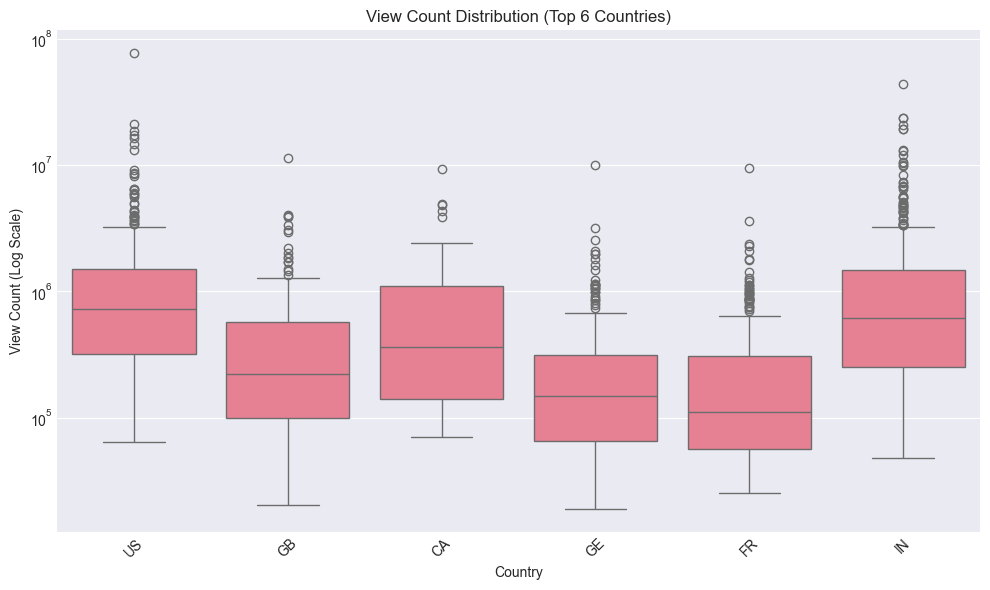

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [28]:
plot_views_by_country(df_cl)

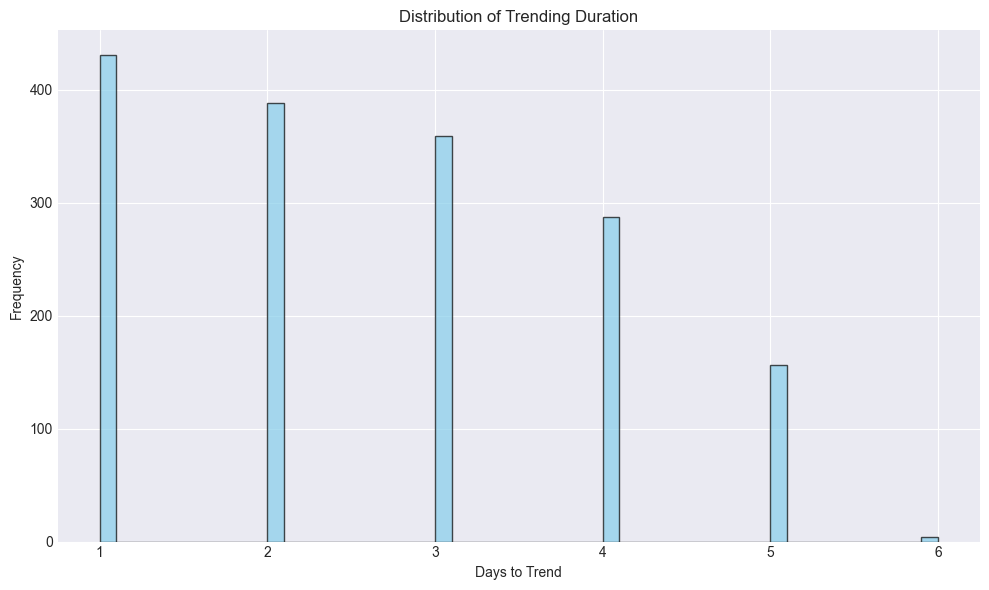

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [29]:
plot_trending_duration(df_cl)

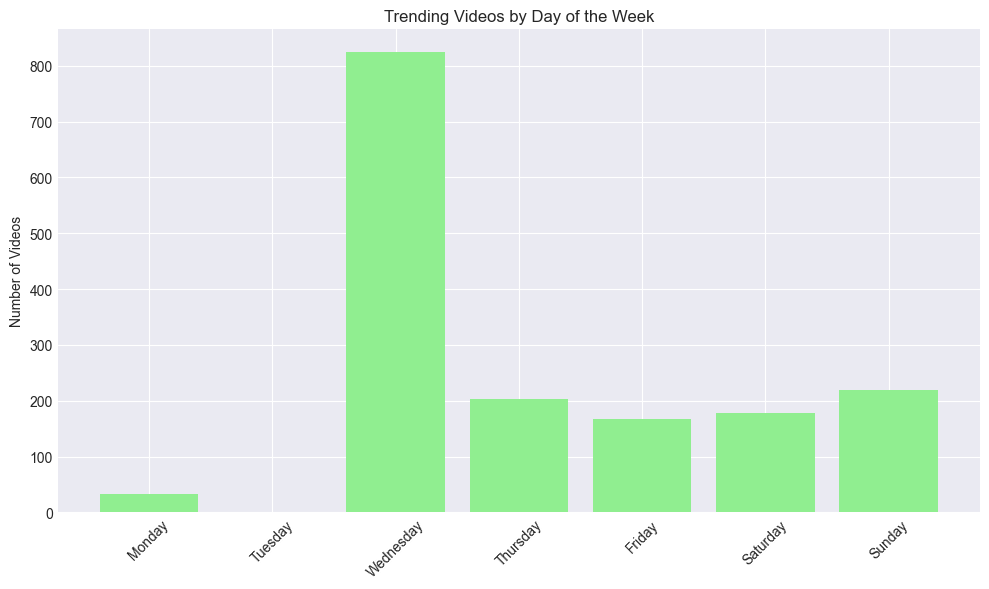

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [30]:
plot_weekly_patterns(df_cl)


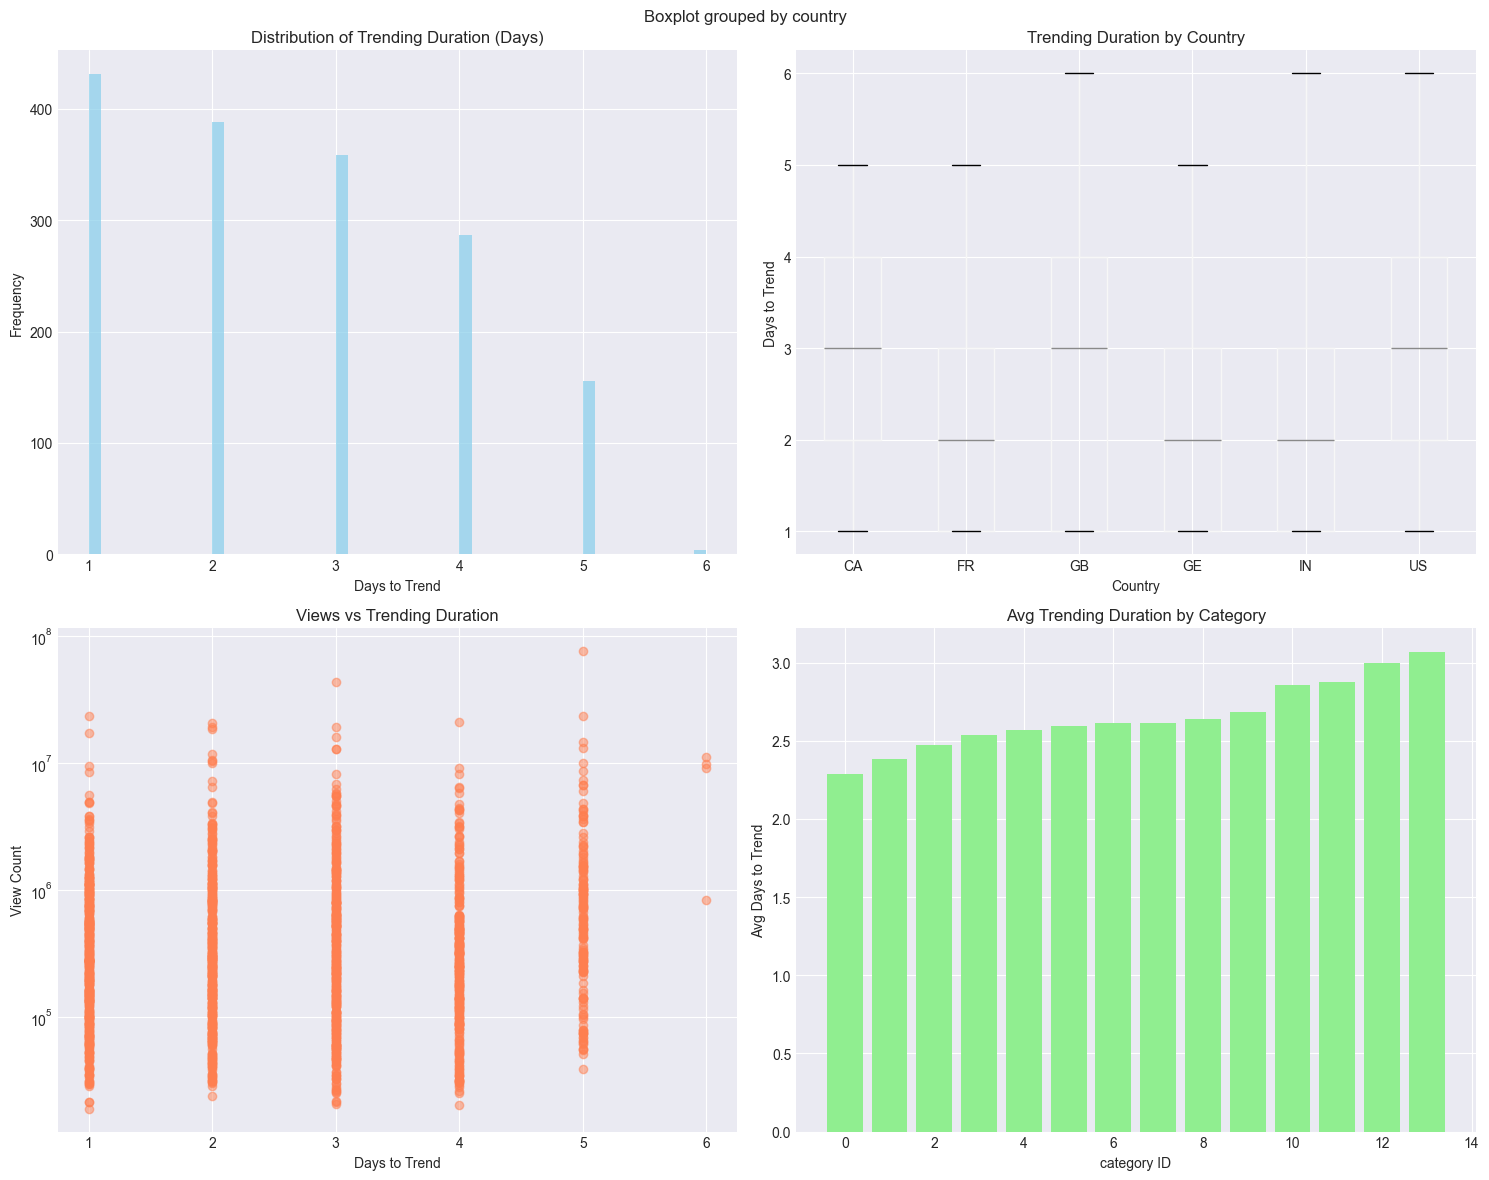

In [31]:
def create_time_series_analysis(df_cl):
    """
    Create time series visualizations for trending duration
    """
    df_time = df_cl[df_cl['trending_days'].between(0, 365)].copy()
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    axes[0, 0].hist(df_time['trending_days'], bins=50, alpha=0.7, color='skyblue')
    axes[0, 0].set_title('Distribution of Trending Duration (Days)')
    axes[0, 0].set_xlabel('Days to Trend')
    axes[0, 0].set_ylabel('Frequency')
    
    df_time.boxplot(column='trending_days', by='country', ax=axes[0, 1])
    axes[0, 1].set_title('Trending Duration by Country')
    axes[0, 1].set_xlabel('Country')
    axes[0, 1].set_ylabel('Days to Trend')
    
    axes[1, 0].scatter(df_time['trending_days'], df_time['view_count'], 
                      alpha=0.5, color='coral')
    axes[1, 0].set_title('Views vs Trending Duration')
    axes[1, 0].set_xlabel('Days to Trend')
    axes[1, 0].set_ylabel('View Count')
    axes[1, 0].set_yscale('log')
    
    if 'category_name' in df_time.columns:
        category_trend = df_time.groupby('category_name')['trending_days'].mean().sort_values()
        axes[1, 1].bar(range(len(category_trend)), category_trend.values, color='lightgreen')
        axes[1, 1].set_title('Avg Trending Duration by Category')
        axes[1, 1].set_xlabel('category ID')
        axes[1, 1].set_ylabel('Avg Days to Trend')
    
    plt.tight_layout()
    plt.show()
    
    return fig

time_series_fig = create_time_series_analysis(df_cl)

In [32]:
output_folder = "C:/Users/akars/OneDrive/Desktop/youtube analysis data"
df_cl.to_csv(f"{output_folder}/trending_videos_data.csv", index=False)

print(f"DataFrame successfully exported to {output_folder}/trending_videos_data.csv")

DataFrame successfully exported to C:/Users/akars/OneDrive/Desktop/youtube analysis data/trending_videos_data.csv


In [35]:
def prepare_tableau_data(df_cl):
    """
    Prepare optimized dataset for Tableau visualization
    """
    tableau_df = df_cl[[
        'video_id', 'title', 'channelTitle', 'categoryId','category_name',
        'trending_date', 'publishedAt', 'view_count', 'likes', 'dislikes',
        'comment_count', 'country', 'total_engagement',
        'like_ratio', 'engagement_rate', 'trending_days',
        'sentiment', 'sentiment_score'
    ]].copy()
    
    tableau_df['view_category'] = pd.cut(tableau_df['view_count'], 
                                        bins=[0, 100000, 1000000, 10000000, float('inf')],
                                        labels=['<100K', '100K-1M', '1M-10M', '>10M'])
    
    tableau_df['engagement_category'] = pd.cut(tableau_df['engagement_rate'],
                                             bins=[0, 0.01, 0.05, 0.1, float('inf')],
                                             labels=['Low', 'Medium', 'High', 'Very High'])
    
    output_folder = "C:/Users/akars/OneDrive/Desktop/youtube analysis data"
    tableau_df.to_csv(f"{output_folder}/Tableau_data.csv", index=False)
    
    return tableau_df

tableau_data = prepare_tableau_data(df_cl)